In [47]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [48]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [49]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [50]:
# def make_graph(stock_data, revenue_data, stock):
#     fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
#     stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
#     revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
#     fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
#     fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
#     fig.update_xaxes(title_text="Date", row=1, col=1)
#     fig.update_xaxes(title_text="Date", row=2, col=1)
#     fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
#     fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
#     fig.update_layout(showlegend=False,
#     height=900,
#     title=stock,
#     xaxis_rangeslider_visible=True)
#     fig.show()
#     from IPython.display import display, HTML
#     fig_html = fig.to_html()
#     display(HTML(fig_html))

In [51]:
tesla = yf.Ticker("TSLA")

# Extract historical data for the maximum period
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
# Display the first few rows (optional)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [52]:
# URL containing the Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the HTML content of the response
html_data = response.text

In [53]:
# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

In [54]:
# Step 3: Locate the second table (Tesla Quarterly Revenue)
table = soup.find_all("tbody")[1]  # Quarterly revenue is in the second <tbody>



In [55]:
# Step 4: Create a list to store rows
data = []

# Step 5: Loop through rows and extract date and revenue
for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        
        if revenue and date:
            data.append({"Date": date, "Revenue": revenue})

# Step 6: Create DataFrame from list of dicts
tesla_revenue = pd.DataFrame(data)

# Step 7: Display first few rows (optional)
print(tesla_revenue.head())

         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757


In [56]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [57]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [58]:
# Display the last 5 rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
51  2009-09-30      46
52  2009-06-30      27


In [59]:
# Create a ticker object for GameStop
gme = yf.Ticker("GME")

In [60]:
# Extract historical stock data for GameStop
gme_data = gme.history(period="max")

# Display the first few rows (optional)
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [61]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")

# Extract historical stock data for GameStop
gme_data = gme.history(period="max")

# Reset the index to move the Date from index to a column
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Webscraping to Extract GME Revenue Data

In [62]:
# URL containing the GME revenue data
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response_2 = requests.get(url_2)

# Save the HTML content of the response
html_data_2 = response_2.text

In [63]:
# Parse the HTML data using BeautifulSoup with html.parser
soup_2 = BeautifulSoup(html_data_2, "html.parser")

In [64]:
# Find the table with GameStop revenue - usually the second <tbody> like before
table = soup_2.find_all("tbody")[1]

# Collect rows in a list
rows = []

for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        
        if date and revenue:
            rows.append([date, revenue])

# Create DataFrame
gme_revenue = pd.DataFrame(rows, columns=["Date", "Revenue"])

# Optionally convert Revenue to numeric
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])

# Display first few rows
print(gme_revenue.head())

         Date  Revenue
0  2020-04-30     1021
1  2020-01-31     2194
2  2019-10-31     1439
3  2019-07-31     1286
4  2019-04-30     1548


In [65]:
print(gme_revenue.tail())

          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


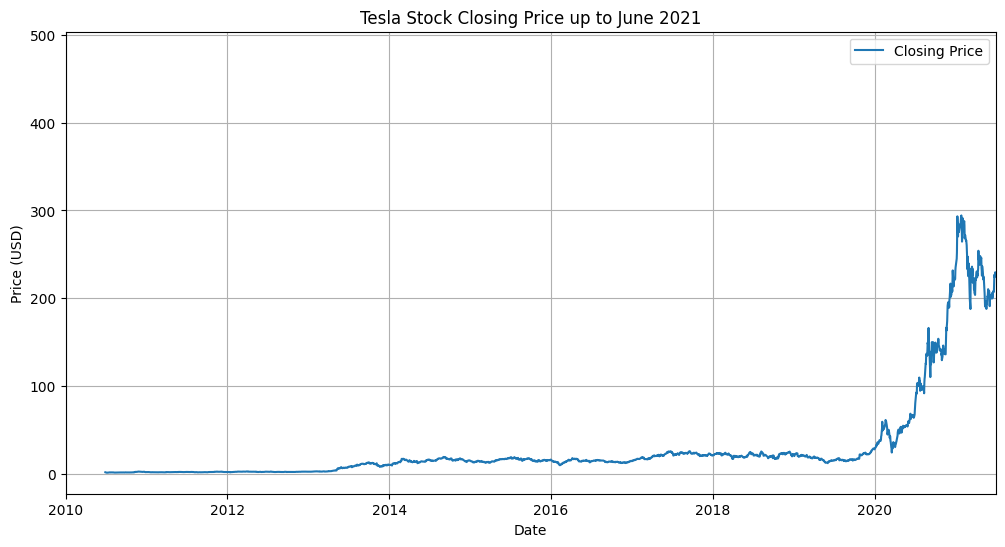

In [66]:
import matplotlib.pyplot as plt
def make_graph(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2021-06-30'))  # Limiting x-axis to June 2021
    plt.show()

# Assuming tesla_data DataFrame is available and has a 'Date' column and 'Close' price column
make_graph(tesla_data, "Tesla Stock Closing Price up to June 2021")